In [52]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [53]:
#Read csv file
House_df = pd.read_csv("House_price.csv")

In [54]:
House_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [55]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
House_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [57]:
House_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

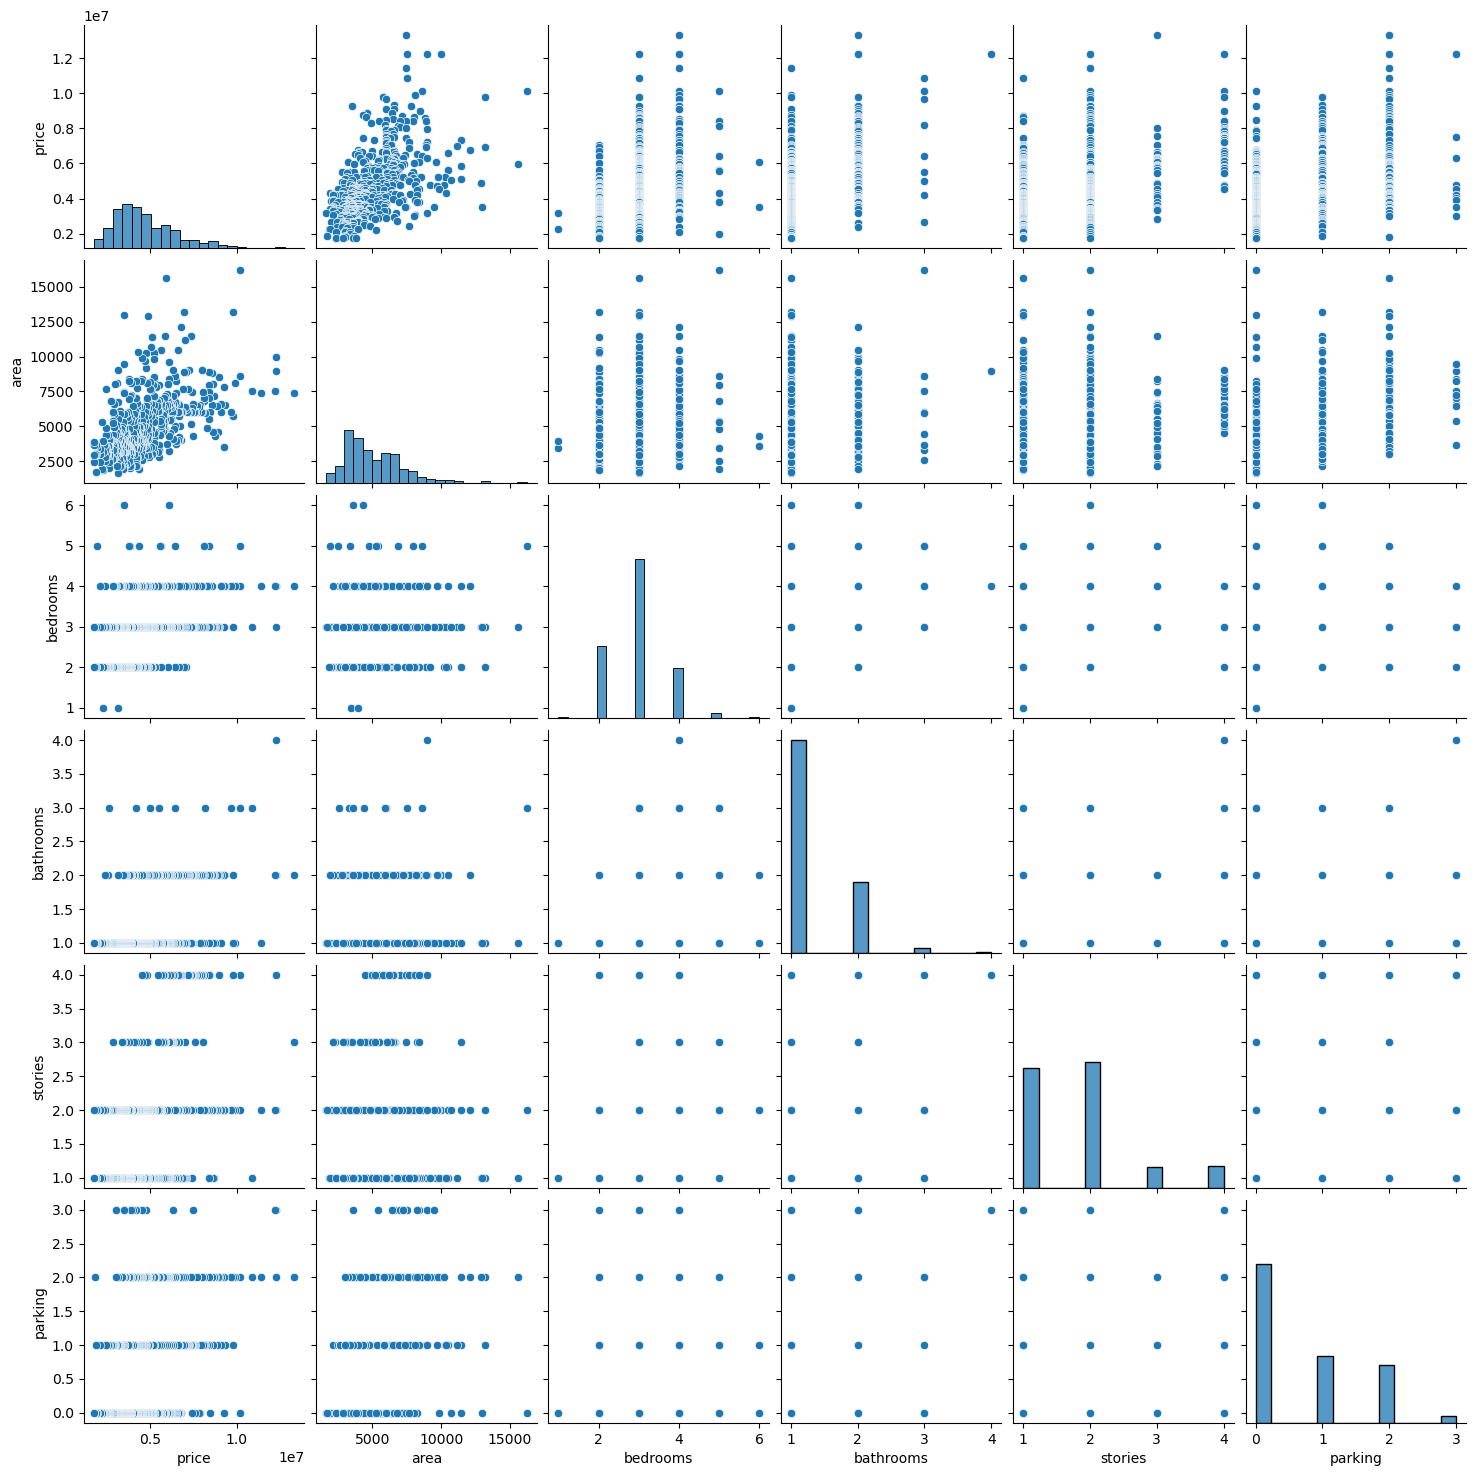

In [58]:
sns.pairplot(House_df)

In [59]:
x = House_df[['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'parking']]

y = House_df['price']

In [60]:
#Training and Testing data split 
x_train , x_test, y_train , y_test = train_test_split(x,y  , test_size = 0.30 , random_state = 101)

In [61]:
x_train

,price,area,bedrooms,bathrooms,stories,parking
227,4690000,6000,2,1,1,1
319,4060000,3000,4,1,3,2
367,3675000,3630,2,1,1,0
515,2450000,3210,3,1,2,0
143,5600000,4800,5,2,3,0
...,...,...,...,...,...,...
316,4060000,5900,4,2,2,1
393,3500000,7424,3,1,1,0
75,6650000,4260,4,2,2,0
337,3920000,2145,4,2,1,0


In [62]:
x_test

,price,area,bedrooms,bathrooms,stories,parking
225,4753000,6440,2,1,1,3
18,8890000,4600,3,2,2,2
48,7455000,4300,3,2,2,1
355,3773000,8250,3,1,1,2
350,3780000,3420,2,1,2,1
...,...,...,...,...,...,...
401,3500000,9500,3,1,2,3
189,5040000,3540,2,1,1,0
43,7700000,6000,4,2,4,2
36,8043000,7482,3,2,3,1


In [63]:
lm = LinearRegression()

In [64]:
lm.fit(x_train , y_train)

LinearRegression()

In [68]:
coeff_df = pd.DataFrame(lm.coef_ , x.columns , columns = ['coefficient'])
coeff_df

,coefficient
price,1.000000e+00
area,-2.967926e-15
bedrooms,-2.913196e-12
bathrooms,-1.862379e-11
stories,-1.622042e-11
parking,6.723437e-12


In [69]:
predictions = lm.predict(x_test)

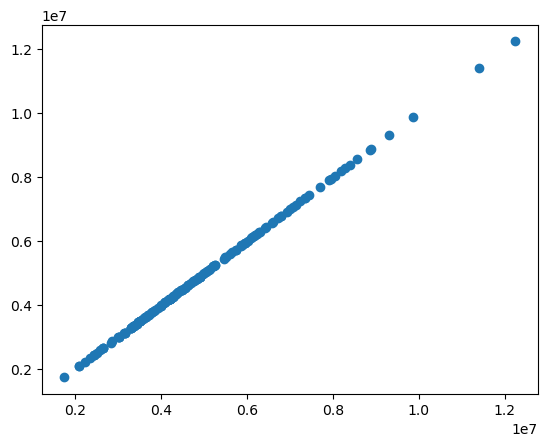

In [70]:
plt.scatter(y_test , predictions)

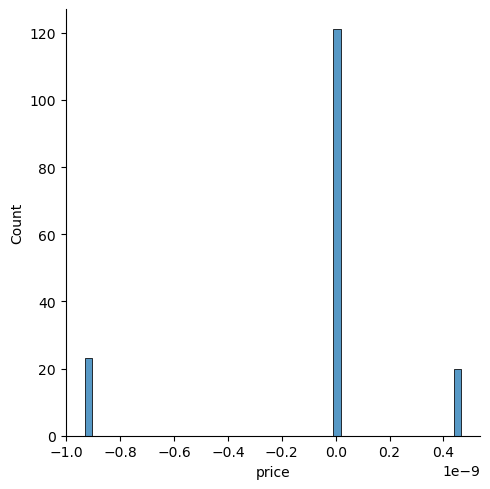

In [73]:
sns.displot((y_test-predictions) , bins = 50);